In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [102]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/attacks.csv",encoding = "ISO-8859-1")
df.dropna()
df.head(5)

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Fatal,Time,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order
0,2017.06.11,11-Jun-17,2017.0,Unprovoked,AUSTRALIA,Western Australia,"Point Casuarina, Bunbury",Body boarding,Paul Goff,M,...,N,08h30,"White shark, 4 m","WA Today, 6/11/2017",2017.06.11-Goff.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2017.06.11,2017.06.11,6095.0
1,2017.06.10.b,10-Jun-17,2017.0,Unprovoked,AUSTRALIA,Victoria,"Flinders, Mornington Penisula",Surfing,female,F,...,N,15h45,7 gill shark,NaN,2017.06.10.b-Flinders.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2017.06.10.b,2017.06.10.b,6094.0
2,2017.06.10.a,10-Jun-17,2017.0,Unprovoked,USA,Florida,"Ponce Inlet, Volusia County",Surfing,Bryan Brock,M,...,N,10h00,NaN,"Daytona Beach News-Journal, 6/10/2017",2017.06.10.a-Brock.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2017.06.10.a,2017.06.10.a,6093.0
3,2017.06.07.R,Reported 07-Jun-2017,2017.0,Unprovoked,UNITED KINGDOM,South Devon,Bantham Beach,Surfing,Rich Thomson,M,...,N,NaN,"3m shark, probably a smooth hound","C. Moore, GSAF",2017.06.07.R-Thomson.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2017.06.07.R,2017.06.07.R,6092.0
4,2017.06.04,04-Jun-17,2017.0,Unprovoked,USA,Florida,"Middle Sambo Reef off Boca Chica, Monroe County",Spearfishing,Parker Simpson,M,...,N,NaN,8' shark,"Nine News, 6/7/2017",2017.06.04-Simpson.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2017.06.04,2017.06.04,6091.0


In [63]:
df['Location'].value_counts()[:1]

New Smyrna Beach, Volusia County    162
Name: Location, dtype: int64

In [62]:
df['Country'].value_counts()[:6]

USA                 2160
AUSTRALIA           1303
SOUTH AFRICA         571
PAPUA NEW GUINEA     133
NEW ZEALAND          126
BRAZIL               103
Name: Country, dtype: int64

In [70]:
df.loc[df['Fatal']=='Y']['Country'].value_counts()[:6]

AUSTRALIA           342
USA                 250
SOUTH AFRICA        137
PAPUA NEW GUINEA     56
MEXICO               44
BRAZIL               40
Name: Country, dtype: int64

In [87]:
surfing_incidents = df.loc[df['Activity'] =='Surfing'].shape[0]
scuba_incidents = df.loc[df['Activity'] =='Scuba Diving'].shape[0]
print("Numbers of attack when Surfing %s"%surfing_incidents)
print("Numbers of attack when Scuba Diving %s"%scuba_incidents)

Numbers of attack when Surfing 931
Numbers of attack when Scuba Diving 6


In [92]:
fatal = df.loc[df['Fatal']=='Y'].shape[0]
non_fatal = df.loc[df['Fatal']=='N'].shape[0]
fatality = fatal / (non_fatal + fatal) * 100
fatality

26.28840020144368

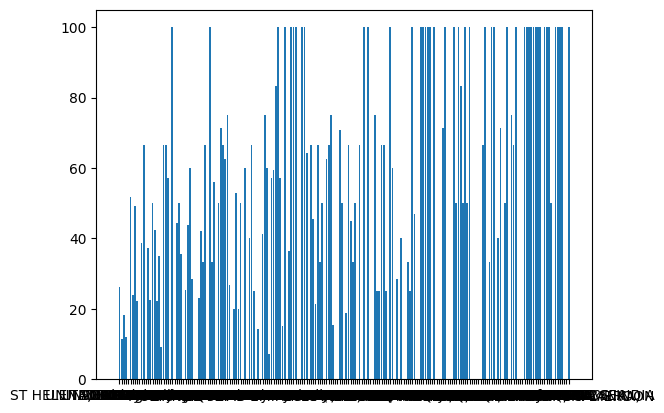

In [138]:
fatalities = [];

for country in df['Country'].unique():
  fatal = df.loc[df['Country'] == country].loc[df['Fatal'] == 'Y'].shape[0]
  total = (df.loc[df['Country'] == country].shape[0])
  if (total == 0) : fatality = 0;
  else : fatality = fatal / (df.loc[df['Country'] == country].shape[0]) * 100
  fatalities.append(fatality)
  # print("Percentage of attacks that are fatal in %s : %f"%(country, fatality))

countries = df['Country'].unique()
plt.bar(np.arange(countries.size),fatalities)
plt.xticks(ticks=np.arange(countries.size), labels=countries)

plt.show()


In [104]:
df['Country'].unique()

array(['AUSTRALIA', 'USA', 'UNITED KINGDOM', 'BAHAMAS',
       'UNITED ARAB EMIRATES', 'MEXICO', 'SOUTH AFRICA', 'REUNION',
       'NEW ZEALAND', 'ST HELENA, British overseas territory', 'BRAZIL',
       'INDONESIA', 'England', 'NEW CALEDONIA', 'SPAIN', 'CHINA', 'JAPAN',
       'COLUMBIA', 'EGYPT', 'FRENCH POLYNESIA', 'CAPE VERDE', 'Fiji',
       'DOMINICAN REPUBLIC', 'CAYMAN ISLANDS', 'ARUBA', 'ECUADOR',
       'MOZAMBIQUE', 'THAILAND', 'FIJI', 'PUERTO RICO', 'ITALY',
       'ATLANTIC OCEAN', 'GREECE', 'MAURITIUS', nan, 'ST. MARTIN',
       'FRANCE', 'PAPUA NEW GUINEA', 'TRINIDAD & TOBAGO', 'KIRIBATI',
       'ISRAEL', 'DIEGO GARCIA', 'TAIWAN', 'JAMAICA',
       'PALESTINIAN TERRITORIES', 'GUAM', 'SEYCHELLES', 'BELIZE',
       'PHILIPPINES', 'NIGERIA', 'TONGA', 'SCOTLAND', 'CANADA', 'CROATIA',
       'SAUDI ARABIA', 'CHILE', 'ANTIGUA', 'KENYA', 'RUSSIA',
       'TURKS & CAICOS', 'COSTA RICA', 'MALAYSIA',
       'UNITED ARAB EMIRATES (UAE)', 'SAMOA', 'AZORES', 'SOLOMON ISLANDS',
      